In [2]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})
plt.rc('text', usetex=True)

In [2]:
mat = np.zeros((4,4000000,41))
print(np.shape(mat[0]))
mat[0] = np.fromfile("./Damping_alpha(" + str(3.7) + ")/xi(" + str(0.8) + ")/lambda(" + str(.8) + ").bin", dtype=np.float64).reshape(4000000, 41)
mat[1] = np.fromfile("./Damping_alpha(" + str(4) + ")/xi(" + str(0.8) + ")/lambda(" + str(.8) + ").bin", dtype=np.float64).reshape(4000000, 41)
mat[2] = np.fromfile("./Damping_alpha(" + str(5) + ")/xi(" + str(0.8) + ")/lambda(" + str(.8) + ").bin", dtype=np.float64).reshape(4000000, 41)
mat[3] = np.fromfile("./Damping_alpha(" + str(8) + ")/xi(" + str(0.8) + ")/lambda(" + str(.8) + ").bin", dtype=np.float64).reshape(4000000, 41)
# Print the loaded data
#data = data.reshape(4000000, 41)
#print(np.shape(data)[0])
#plt.plot(data[0])
#print(np.shape(data[0]))

(4000000, 41)


FileNotFoundError: [Errno 2] No such file or directory: './Damping_alpha(3.7)/xi(0.8)/lambda(0.8).bin'

In [ ]:
alpha = 2
control = int(np.shape(data)[0]/50)
print(control)

#Plotting Features-------------------------------------------------------------------------------
fig = plt.figure(figsize = (8, 4))
ax = fig.add_subplot(111, projection = '3d')

xlim = (-20,20)
xLabel = ax.set_xlabel(r"Position n", linespacing=3.2, fontsize=20)
yLabel = ax.set_ylabel(r"t", linespacing=3.1, fontsize=20)
zLabel = ax.set_zlabel(r"$P_n$", linespacing=3.4, fontsize=20)
ax.zaxis.set_rotate_label(False) 
# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# end of plotting Features ---------------------------------------------------------------------


for i in range(1, int(np.shape(data)[0]/control)):
    x = np.linspace(-np.shape(data)[1]/2,np.shape(data)[1]/2,np.shape(data)[1])
    ax.plot(x, np.ones(np.shape(data)[1])*i*control, data[i*control], color="r")

ax.plot(x, np.ones(np.shape(data)[1])*0, data[0], color="r",label=r'$ \alpha $ = ' + str(alpha))
ax.set_zlim(0, 1)
# ax.set_xlim(xlim)
ax.legend(fontsize=16)
plt.savefig("HDNLS(" + str(alpha) + ").jpg")
plt.show()

NameError: name 'data' is not defined

(4000, 41)
133


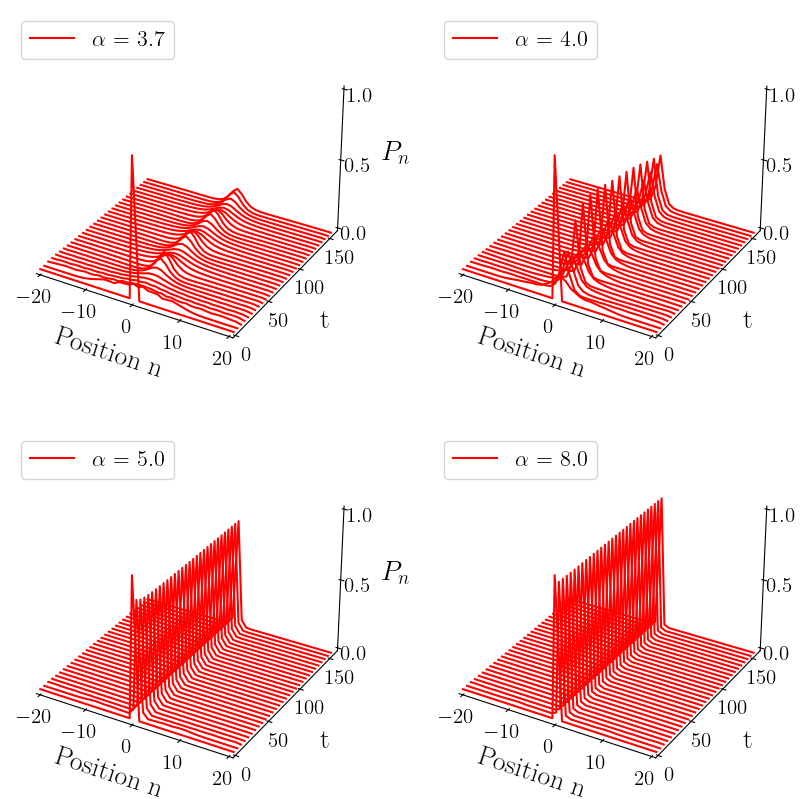

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 4000
Time = 160
mat = np.zeros((4, N, 41))
alpha = np.array([3.7,4,5,8])
print(np.shape(mat[0]))
damp = 0.6

mat[0] = np.fromfile("./Damping_alpha(" + str(3.7) + ")/xi(" + str(damp) + ")/lambda(" + str(damp) + ").bin", dtype=np.float64).reshape(N, 41)
mat[1] = np.fromfile("./Damping_alpha(" + str(4) + ")/xi(" + str(damp) + ")/lambda(" + str(damp) + ").bin", dtype=np.float64).reshape(N, 41)
mat[2] = np.fromfile("./Damping_alpha(" + str(5) + ")/xi(" + str(damp) + ")/lambda(" + str(damp) + ").bin", dtype=np.float64).reshape(N, 41)
mat[3] = np.fromfile("./Damping_alpha(" + str(8) + ")/xi(" + str(damp) + ")/lambda(" + str(damp) + ").bin", dtype=np.float64).reshape(N, 41)
control = int(np.shape(mat[0])[0] / 30)
print(control)

# Plotting Features
fig = plt.figure(figsize=(10, 10))

for i in range(4):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    ax.set_xlim(-20, 20)
    ax.set_ylim(0, Time)
    xLabel = ax.set_xlabel(r"Position n", linespacing=3.2, fontsize=20)
    yLabel = ax.set_ylabel(r"t", linespacing=3.1, fontsize=20)
    zLabel = ax.set_zlabel(r"$P_n$", linespacing=3.4, fontsize=20)
    ax.zaxis.set_rotate_label(False)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
    ax.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
    ax.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)

    for j in range(1, int(np.shape(mat[i])[0] / control)):
        x = np.linspace(-np.shape(mat[i])[1] / 2, np.shape(mat[i])[1] / 2, np.shape(mat[i])[1])
        y = np.linspace(0, Time, np.shape(mat[i])[0])
        ax.plot(x, y[j * control] * np.ones(np.shape(mat[i])[1]), mat[i][j * control], color="r")

    ax.plot(x, np.ones(np.shape(mat[i])[1]) * 0, mat[i][0], color="r", label=r'$ \alpha $ = ' + str(alpha[i]))
    ax.set_zticks([0, 0.5, 1])
    ax.tick_params(axis='y', pad=-1) 
    ax.tick_params(axis='x', pad=-1) 
    ax.tick_params(axis='z', pad=-1) 

    ax.legend(fontsize=16, loc= 'upper left')


#plt.savefig("HDNLS(" + str(damp) + ").jpg")
plt.show()


(4000000,)


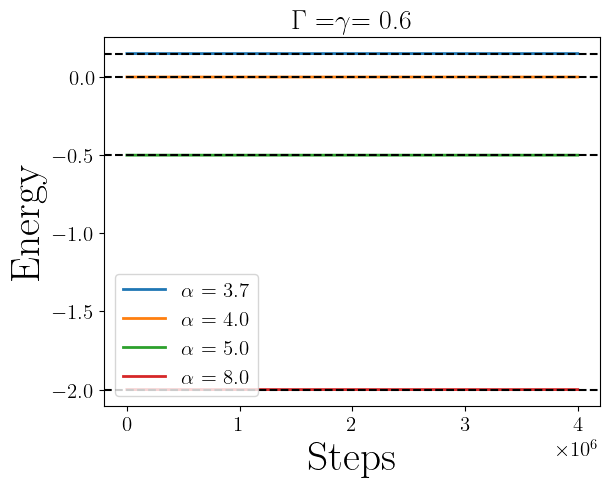

In [ ]:
alpha = np.array([3.7,4,5,8])
data = np.zeros((4,4000000))
damp = 0.6
#data = np.zeros((4,4))
data[0] = np.fromfile("./Damping_alpha(" + str(3.7) + ")/xi(" + str(damp) + ")/energy.bin", dtype=np.float64)
data[1] = np.fromfile("./Damping_alpha(" + str(4) + ")/xi(" + str(damp) + ")/energy.bin", dtype=np.float64)
data[2] = np.fromfile("./Damping_alpha(" + str(5) + ")/xi(" + str(damp) + ")/energy.bin", dtype=np.float64)
data[3] = np.fromfile("./Damping_alpha(" + str(8) + ")/xi(" + str(damp) + ")/energy.bin", dtype=np.float64)
print(np.shape(data[0]))
plt.plot(data[0], label=r'$ \alpha $ = ' + str(alpha[0]), linewidth=2)
plt.plot(data[1], label=r'$ \alpha $ = ' + str(alpha[1]), linewidth=2)
plt.plot(data[2], label=r'$ \alpha $ = ' + str(alpha[2]), linewidth=2)
plt.plot(data[3], label=r'$ \alpha $ = ' + str(alpha[3]), linewidth=2)

plt.axhline(y = 0.15, color = 'black', linestyle = '--')
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.axhline(y = -0.5, color = 'black', linestyle = '--')
plt.axhline(y = -2.0, color = 'black', linestyle = '--')

plt.legend(fontsize=15, loc="lower left")
plt.title("$ \Gamma $ =$ \gamma $= " + str(damp), fontsize = 20)
plt.xlabel("Steps")
plt.ylabel("Energy")
plt.savefig("Energy" + str(damp) + ".jpg")
plt.show()

Text(0, 0.5, '$p_0$')

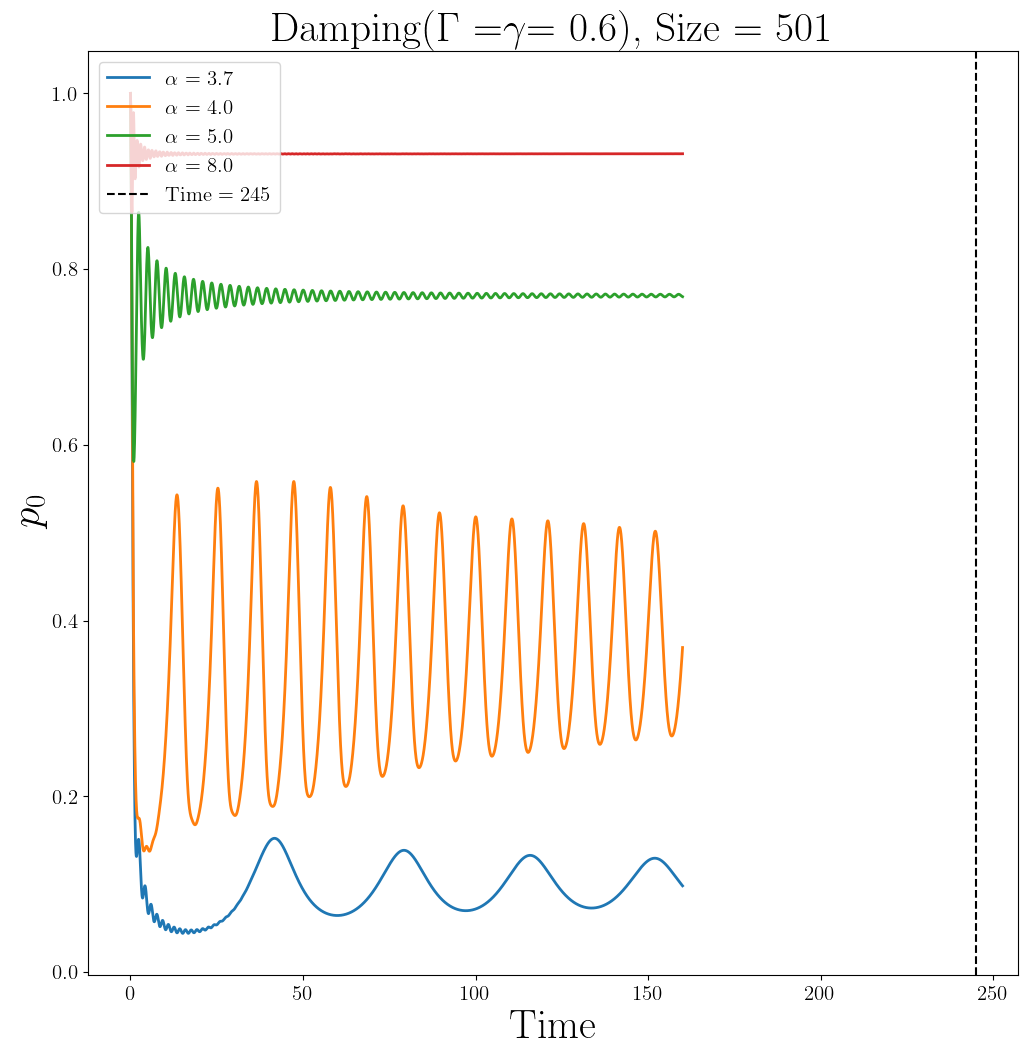

In [ ]:
fig = plt.figure(figsize=(12, 12))

pzero = np.zeros((4,N))
for i in range(4):
    for j in range(N):
        pzero[i,j] = mat[i, j, 20]

y = np.linspace(0, Time, np.shape(mat[i])[0])
plt.plot(y, pzero[0], label=r'$ \alpha $ = ' + str(alpha[0]), linewidth=2)
plt.plot(y, pzero[1], label=r'$ \alpha $ = ' + str(alpha[1]), linewidth=2)
plt.plot(y, pzero[2], label=r'$ \alpha $ = ' + str(alpha[2]), linewidth=2)
plt.plot(y, pzero[3], label=r'$ \alpha $ = ' + str(alpha[3]), linewidth=2)
plt.axvline(x = 245, color = 'black', linestyle = '--', label = 'Time = 245')
plt.legend(fontsize=15, loc="upper left")
plt.title("Damping($ \Gamma $ =$ \gamma $= " + str(damp) + "), Size = 501", fontsize = 30)
plt.xlabel("Time")
plt.ylabel("$p_0$")
#plt.savefig("p0-501-" + str(damp) + ".jpg")

In [ ]:
N = 2000
N2 = 3000
Time = 1000
Time1 = 240
mat = np.zeros((4, N2))
mat2 = np.zeros((4, N))
alpha = np.array([3.7,4,5,8])
damp = 0.5
print(np.shape(mat[0]))

mat[0] = np.fromfile("./Damping_alpha(3.7)/xi(0.5)/pzero.bin", dtype=np.float64)#.reshape(N, 501)
mat[1] = np.fromfile("./Damping_alpha(4)/xi(0.5)/pzero.bin", dtype=np.float64)#.reshape(N, 501)
mat[2] = np.fromfile("./Damping_alpha(5)/xi(0.5)/pzero.bin", dtype=np.float64)#.reshape(N, 501)
mat[3] = np.fromfile("./Damping_alpha(8)/xi(0.5)/pzero.bin", dtype=np.float64)#.reshape(N, 501)
mat2[0] = np.fromfile("./Damping_alpha(3.7)/xi(0.5)-1501/pzero.bin", dtype=np.float64)#.reshape(N, 501)
mat2[1] = np.fromfile("./Damping_alpha(4)/xi(0.5)-1501/pzero.bin", dtype=np.float64)#.reshape(N, 501)
mat2[2] = np.fromfile("./Damping_alpha(5)/xi(0.5)-1501/pzero.bin", dtype=np.float64)#.reshape(N, 501)
mat2[3] = np.fromfile("./Damping_alpha(8)/xi(0.5)-1501/pzero.bin", dtype=np.float64)#.reshape(N, 501)

fig = plt.figure(figsize=(10, 8))

#pzero = np.zeros((4,N))
#for i in range(2):
#    for j in range(N):
#        pzero[i,j] = mat[i, j, 250]

y = np.linspace(0, Time1, np.shape(mat[0])[0])
y1 = np.linspace(0, Time, np.shape(mat2[0])[0])

plt.plot(y, mat[0], label=r'$ \alpha $ = ' + str(alpha[0]), linewidth=2)
plt.plot(y, mat[1], label=r'$ \alpha $ = ' + str(int(alpha[1])), linewidth=2)
plt.plot(y, mat[2], label=r'$ \alpha $ = ' + str(int(alpha[2])), linewidth=2)
plt.plot(y, mat[3], label=r'$ \alpha $ = ' + str(int(alpha[3])), linewidth=2)
for i in range(len(mat)):
    plt.plot(y1, mat2[i], label=r'$ \alpha $ = ' + str(int(alpha[i])), linewidth=2)
#plt.axvline(x = 245, color = 'black', linestyle = '--', label = 'Time = 245')
#plt.axvline(x = 500, color = 'black', linestyle = '--', label = 'Time = 490')
plt.legend(fontsize=15, loc="lower right")
#plt.title("", fontsize = 30)
plt.xlabel("Time")
plt.ylabel("$p_0$")
#plt.ylim(-1,1)
#plt.xlim(0,500)
#plt.savefig("p0-1501-ref-" + str(damp) + ".jpg")

(3000,)


ValueError: could not broadcast input array from shape (1200,) into shape (3000,)

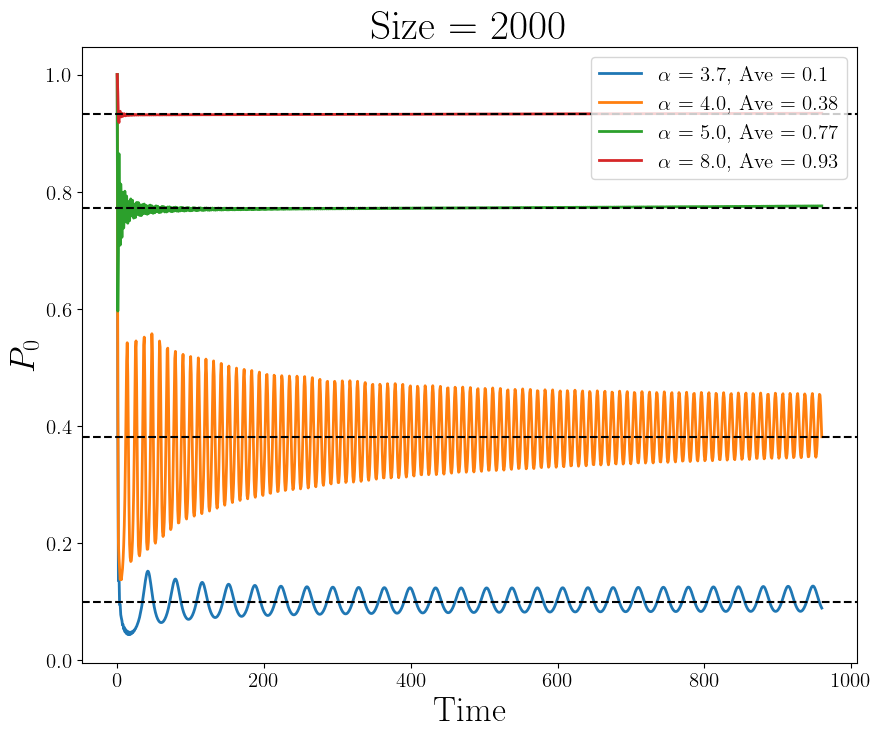

In [ ]:
fig = plt.figure(figsize=(10, 8))

mat = np.zeros((4, 1200))
alpha = np.array([3.7,4,5,8])

mat[0] = np.fromfile("./Damping_alpha(3.7)/xi(0.5)/pzero.bin", dtype=np.float64)#.reshape(N, 501)
mat[1] = np.fromfile("./Damping_alpha(4)/xi(0.5)/pzero.bin", dtype=np.float64)#.reshape(N, 501)
mat[2] = np.fromfile("./Damping_alpha(5)/xi(0.5)/pzero.bin", dtype=np.float64)#.reshape(N, 501)
mat[3] = np.fromfile("./Damping_alpha(8)/xi(0.5)/pzero.bin", dtype=np.float64)#.reshape(N, 501)

#print(np.shape(maat), np.shape(maat2))
y = np.linspace(0, 960, 1200)
for i in range(4):
    plt.plot(y, mat[i], label= r'$ \alpha $ = ' + str(alpha[i]) + ', Ave = ' + str(round(np.mean(mat[i]),2)), linewidth=2)
    plt.axhline(y = np.mean(mat[i]), color = 'black', linestyle = '--')

#plt.xlim(0,300)
plt.xlabel("Time", fontsize=25)
plt.ylabel("$P_0$", fontsize=25)
plt.title("Size = 2000", fontsize=30)
plt.legend(loc="upper right", fontsize=15)
plt.show()


0.12332812875750505
0.125
3.75


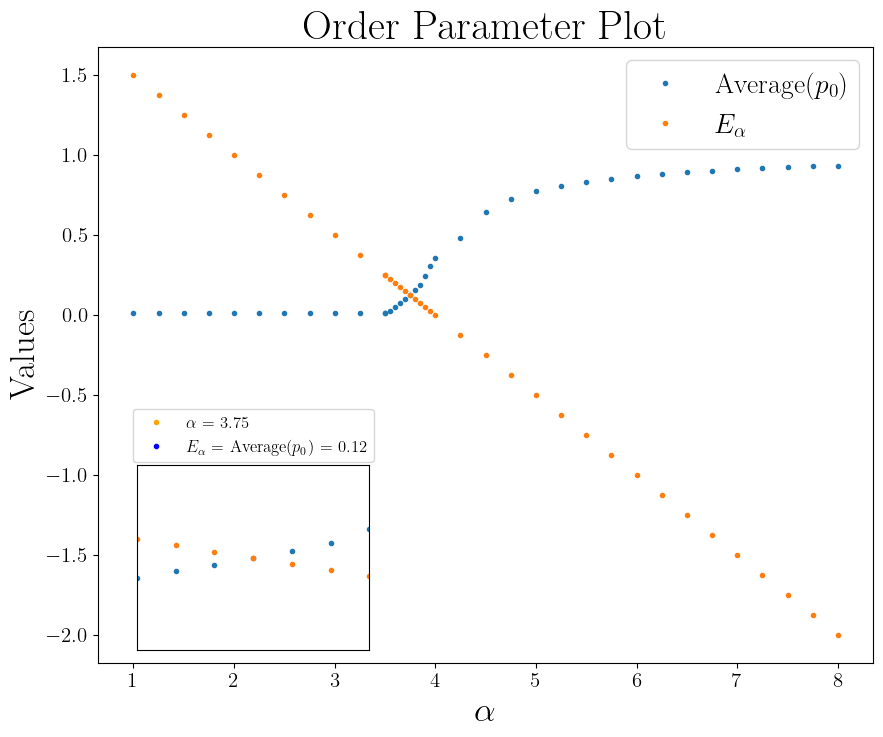

In [ ]:
fig, axis = plt.subplots(figsize=(10, 8))

alpha = [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.50, 3.55, 3.60, 3.65, 3.70, 3.75, 3.80, 3.85, 3.90, 3.95, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.25, 7.5, 7.75, 8]
ave = np.fromfile("./AllAlpha/ave.bin", dtype=np.float64).reshape(len(alpha))
energy = np.fromfile("./AllAlpha/energy.bin", dtype=np.float64).reshape(len(alpha))
print(ave[16])
print(energy[16])
print(alpha[16])

# Create an inset axis in the bottom right corner
axin = axis.inset_axes([0.05, 0.02, 0.30, 0.30])# Plot the data on the inset axis and zoom in on the important part
axin.plot(alpha, ave, '.')
axin.plot(alpha, energy, '.')
axin.set_xlim(3.6,3.9)
axin.set_ylim(-0.25, 0.5)
axin.plot([], [], '.', color='orange', label=r'$\alpha$ = 3.75')
axin.plot([], [], '.', color='b', label=r'$E_\alpha$ = Average($p_0$) = 0.12')
axin.legend(loc="upper center", bbox_to_anchor=(0.5, 1.35), fontsize = 12)
axin.set_xticks([])
axin.set_yticks([])
# Add the lines to indicate where the inset axis is coming from
#axis.indicate_inset_zoom(axin)

plt.plot(alpha, ave, '.', label= r'Average($p_0$)')#, label = "Average($p_0$)"
plt.plot(alpha, energy, '.', label = r'$E_ \alpha $') #

#plt.legend(fontsize=15, loc="upper left")
plt.title("Order Parameter Plot", fontsize = 30)
plt.xlabel(r'$ \alpha $', fontsize = 25)
plt.ylabel("Values", fontsize = 25)
plt.legend(fontsize = 20)

plt.savefig("Values.jpg")

(4500,)
0.35080496133333333


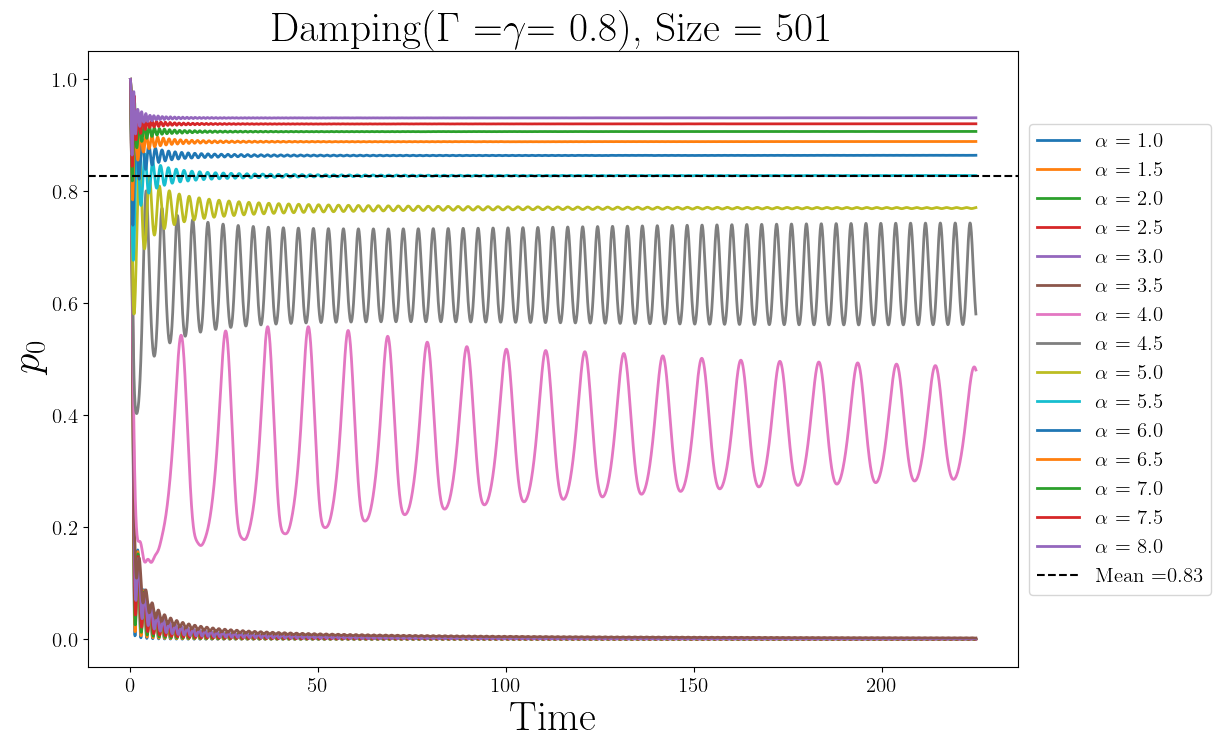

In [ ]:
fig = plt.figure(figsize=(12, 8))

N = 4500
Time = 225
mat = np.zeros((15, N))
alpha = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8])
print(np.shape(mat[0]))
y = np.linspace(0, Time, N)

for i in range(len(alpha)):
    mat[i] = np.loadtxt("./AllAlpha/pzero" + str(i) + ".txt")

for i in range(len(alpha)):
    plt.plot(y, mat[i], label=r'$ \alpha $ = ' + str(alpha[i]), linewidth=2)

print(np.mean(mat[6]))
plt.axhline(y = np.mean(mat[9]), color = 'black', linestyle = '--', label = 'Mean =' + str(round(np.mean(mat[9]), 2)))
plt.legend(fontsize=15, loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Damping($ \Gamma $ =$ \gamma $= " + str(0.8) + "), Size = 501", fontsize = 30)
plt.xlabel("Time")
plt.ylabel("$p_0$")
plt.savefig("Allp0.jpg")

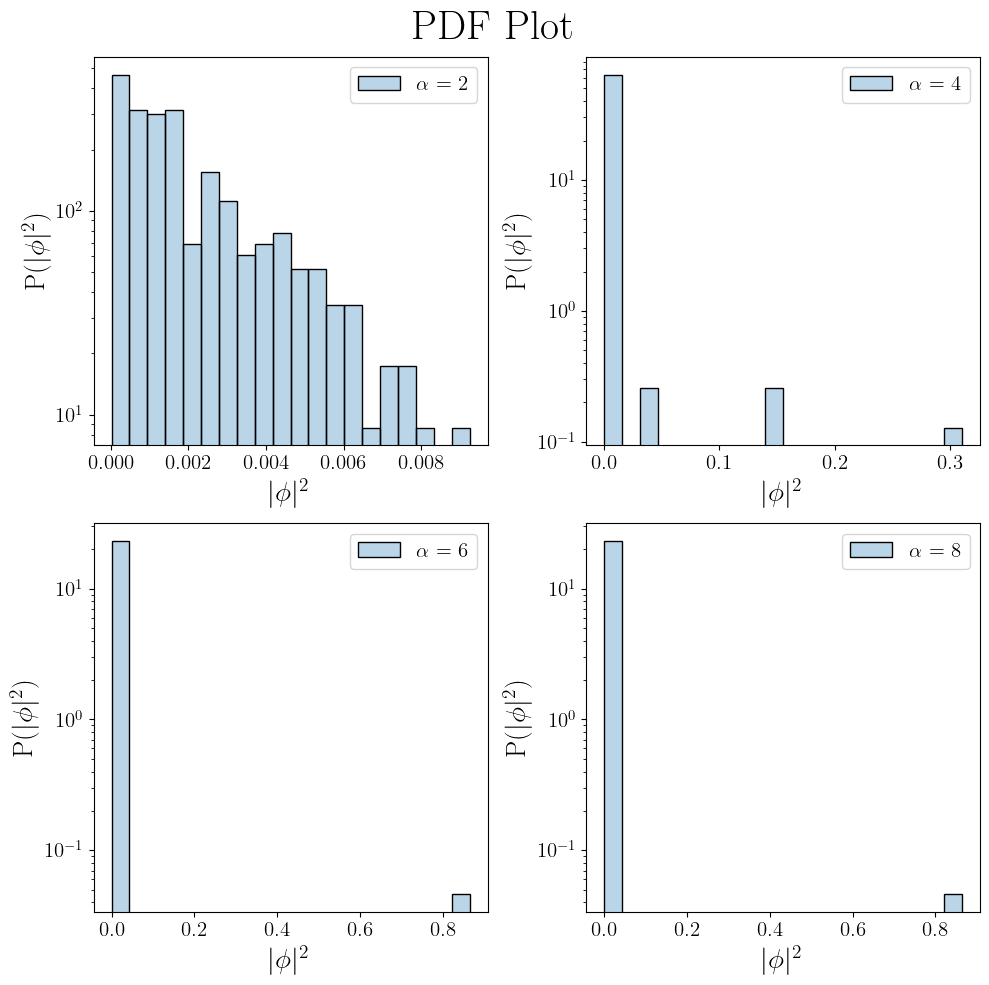

In [ ]:
import seaborn as sns
from scipy import stats
alpha = [2, 4, 6, 8]

fig, axs = plt.subplots(2, 2, figsize=(10,10))
mat = np.fromfile("./AllAlpha/dens.bin", dtype=np.float64).reshape(len(alpha), 501) #len(alpha)

sns.histplot(mat[0], stat = 'density', bins=20, alpha = 0.3, label=r'$ \alpha $ = ' + str(alpha[0]), ax = axs[0, 0]) #, kde=True
sns.histplot(mat[1], stat = 'density', bins=20, alpha = 0.3, label=r'$ \alpha $ = ' + str(alpha[1]), ax = axs[0, 1]) #, kde=True
sns.histplot(mat[2], stat = 'density', bins=20, alpha = 0.3, label=r'$ \alpha $ = ' + str(alpha[2]), ax = axs[1, 0]) #, kde=True
sns.histplot(mat[2], stat = 'density', bins=20, alpha = 0.3, label=r'$ \alpha $ = ' + str(alpha[3]), ax = axs[1, 1]) #, kde=True

#plt.xlim(0,0.05)
axs[0, 0].set_xlabel("$|\phi|^2$")
axs[0, 0].set_ylabel("P($|\phi|^2$)")
axs[0, 0].set_yscale('log')
axs[0, 0].legend(fontsize=15)

axs[0, 1].set_xlabel("$|\phi|^2$")
axs[0, 1].set_ylabel("P($|\phi|^2$)")
axs[0, 1].set_yscale('log')
axs[0, 1].legend(fontsize=15)

axs[1, 0].set_xlabel("$|\phi|^2$")
axs[1, 0].set_ylabel("P($|\phi|^2$)")
axs[1, 0].set_yscale('log')
axs[1, 0].legend(fontsize=15)

axs[1, 1].set_xlabel("$|\phi|^2$")
axs[1, 1].set_ylabel("P($|\phi|^2$)")
axs[1, 1].set_yscale('log')
axs[1, 1].legend(fontsize=15)
fig.suptitle('PDF Plot', fontsize=30)
fig.tight_layout()
plt.show()


(301, 5000)


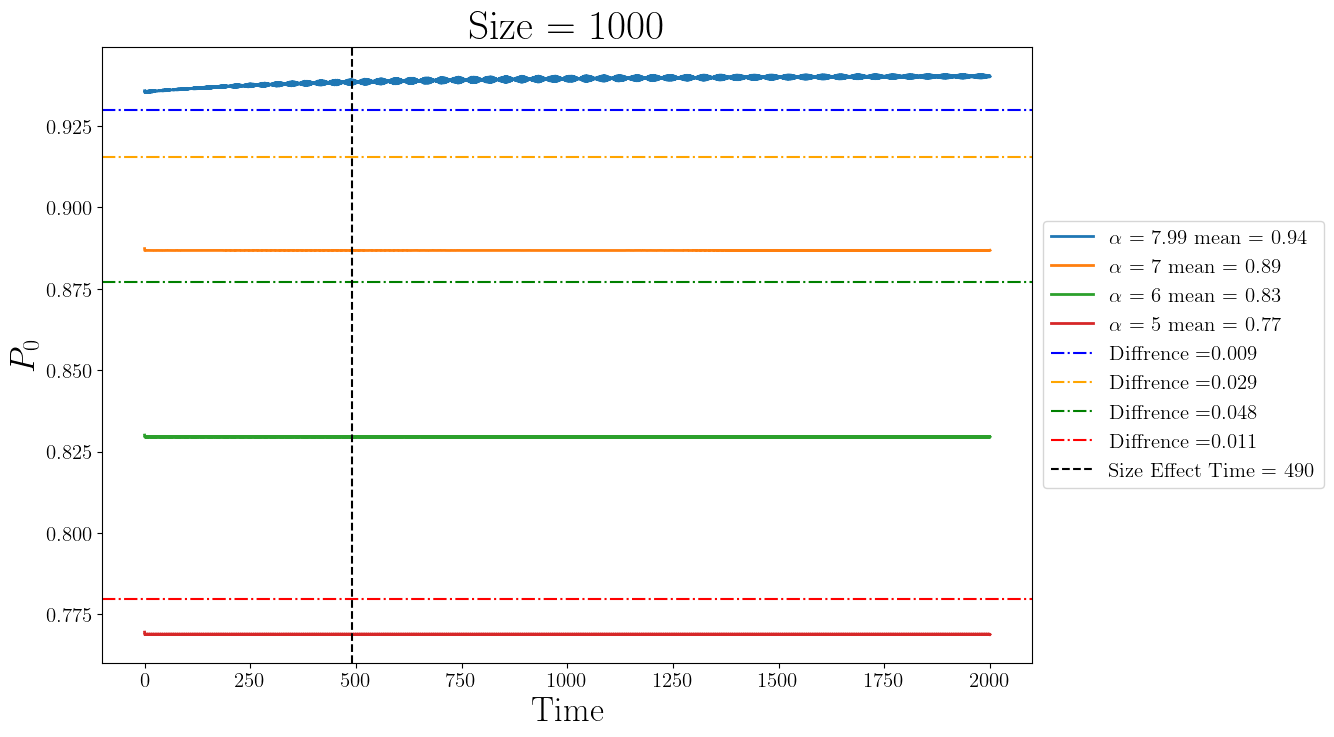

In [ ]:
alpha = [7.99,7,6,5]
mat = np.fromfile("./ClusterResult/Adia/xi(0.8)/pzero.bin", dtype=np.float64).reshape(301, 5000)
listt = [7, 6, 5]
meann = []
for i in listt:
    data = np.fromfile("./Damping_alpha(" + str(i) + ")/xi(0.8)/pzero.bin", dtype=np.float64)
    meann.append(np.mean(data))

print(np.shape(mat))
fig = plt.figure(figsize=(12, 8))
Time = 2000
N = 5000
y = np.linspace(0, Time, N)

plt.plot(y, mat[0], label=r'$ \alpha $ = ' + str(alpha[0]) + ' mean = ' + str(round(np.mean(mat[0]), 2)), linewidth=2)
plt.plot(y, mat[99], label=r'$ \alpha $ = ' + str(alpha[1]) + ' mean = ' + str(round(np.mean(mat[99]), 2)), linewidth=2)#15
plt.plot(y, mat[199], label=r'$ \alpha $ = ' + str(alpha[2]) + ' mean = ' + str(round(np.mean(mat[199]), 2)), linewidth=2)#22
plt.plot(y, mat[-2], label=r'$ \alpha $ = ' + str(alpha[3]) + ' mean = ' + str(round(np.mean(mat[-2]), 2)), linewidth=2)#28
#plt.plot(y, mat[0], label=r'$ \alpha $ = ' + str(5), linewidth=2)
#plt.axhline(y = round(np.mean(mat), 2), color = 'black', linestyle = '--', label = 'DataMean =' + str(round(np.mean(mat), 2)))
#plt.plot(np.NaN, np.NaN, '-', color='none', label='Real')
plt.axhline(y = 0.93, color = 'b', linestyle = 'dashdot', label = 'Diffrence =' + str(round(np.abs(0.93 - np.mean(mat[0])),3)))
plt.axhline(y = meann[0], color = 'orange', linestyle = 'dashdot', label = 'Diffrence =' + str(round(np.abs(meann[0] - np.mean(mat[99])), 3)))
plt.axhline(y = meann[1], color = 'g', linestyle = 'dashdot', label = 'Diffrence =' + str(round(np.abs(meann[1] - np.mean(mat[199])), 3)))
plt.axhline(y = meann[2], color = 'r', linestyle = 'dashdot', label = 'Diffrence =' + str(round(np.abs(meann[2] - np.mean(mat[-2])), 3)))
plt.axvline(x = 490, color = 'black', linestyle = '--', label = 'Size Effect Time = 490')
plt.xlabel("Time", fontsize=25)
plt.ylabel("$P_0$", fontsize=25)
plt.title("Size = 1000", fontsize=30)
#plt.ylim(0.925,0.944)
plt.legend(fontsize=15, loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

# Checking theresult of code

In [97]:
def H(a, alpha, N):
    result = complex(0, 0)

    for i in range(N):
        R = i + 1
        if R==N:
            R=(N-1)
        result += 2.0 * np.abs(a[i])**2 - a[i] * a[R].conjugate() - a[R] * a[i].conjugate() - (alpha / 2) * np.abs(a[i])**2 * np.abs(a[i])**2

    return result


alpha = [7,6,5,4]
pzero = np.fromfile("./Adia/xi(0.8)/pzero.bin", dtype=np.float64).reshape(1, 2500)
finalwave = np.loadtxt("./Adia/xi(0.8)/alphavec.txt")
complex_array = np.array(finalwave[:, 0] + 1j * finalwave[:, 1], dtype=np.complex128)
#complex_array = complex_array.reshape((1, -1))
print(np.shape(complex_array))
print(H(complex_array, 7, 1001).real)



import numpy as np

def load_complex_array(file_path, shape):
    # Read the text file into a NumPy array
    data = np.loadtxt(file_path, dtype=np.float64)

    # Extract real and imaginary parts from the data array
    real_parts = data[:, 0]
    imag_parts = data[:, 1]

    # Combine real and imaginary parts to create a complex array
    complex_data = real_parts + 1j * imag_parts

    # Reshape the complex array to the desired shape
    complex_data = complex_data.reshape(shape)  # Assuming Fortran order (column-major)

    return complex_data

# Example usage
file_path = "./Adia/xi(0.8)/alphavec.txt"
desired_shape = (4, 1001)

# Read the data and reshape it into a complex array
complex_data = load_complex_array(file_path, desired_shape)


norm = np.fromfile("./Adia/xi(0.8)/norm.bin", dtype=np.float64).reshape(4, 2501)
energy = np.fromfile("./Adia/xi(0.8)/energy.bin", dtype=np.float64).reshape(4, 2501)
Time = 2000
N = 2500
time = np.linspace(0, Time, N)
newtime = np.linspace(0, Time, N + 1)
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(16, 16))
ax[0,0].plot(time, pzero[0])
ax[0,0].plot(time, pzero[1])
ax[0,0].plot(time, pzero[2])
ax[0,0].set_xlabel(r'$Time$')
ax[0,0].set_ylabel(r'$p_0$')

ax[0,1].plot(np.abs(complex_data[0]))
ax[0,1].plot(np.abs(complex_data[1]))
ax[0,1].plot(np.abs(complex_data[2]))
ax[0,1].set_xlabel(r'$Size$')
ax[0,1].set_ylabel(r'$Amplitude$')


print(H(complex_data[0], alpha[1], 1001).real, H(complex_data[1], alpha[2], 1001).real, H(complex_data[2], alpha[3], 1001).real)
print(energy[0,2401],energy[1,2401],energy[2,2401])




ax[1,0].plot(newtime, norm[0])
ax[1,0].plot(newtime, norm[1])
ax[1,0].plot(newtime, norm[2])
ax[1,0].set_ylim(0.98,1.02)
ax[1,0].set_xlabel(r'$Time$')
ax[1,0].set_ylabel(r'$Norm$')

ax[1,1].plot(newtime, energy[0], label = r"$\alpha$ = " + str(alpha[0]))
ax[1,1].plot(newtime, energy[1], label = r"$\alpha$ = " + str(alpha[1]))
ax[1,1].plot(newtime, energy[2], label = r"$\alpha$ = " + str(alpha[2]))
ax[1,1].axhline(y = -1.5, color = 'black', linestyle = '--')
ax[1,1].axhline(y = -1, color = 'black', linestyle = '--')
ax[1,1].axhline(y = -0.5, color = 'black', linestyle = '--')
ax[1,1].set_xlabel(r'$Time$')
ax[1,1].set_ylabel(r'$Energy$')
ax[1,1].legend(fontsize = 16)

print(np.mean(pzero[0]), np.mean(pzero[1]), np.mean(pzero[2]))

(1001,)
-1.5000585082336952


ValueError: cannot reshape array of size 1001 into shape (4,1001)

0.8867468161449295 0.8295111357443613 0.7688487461654092


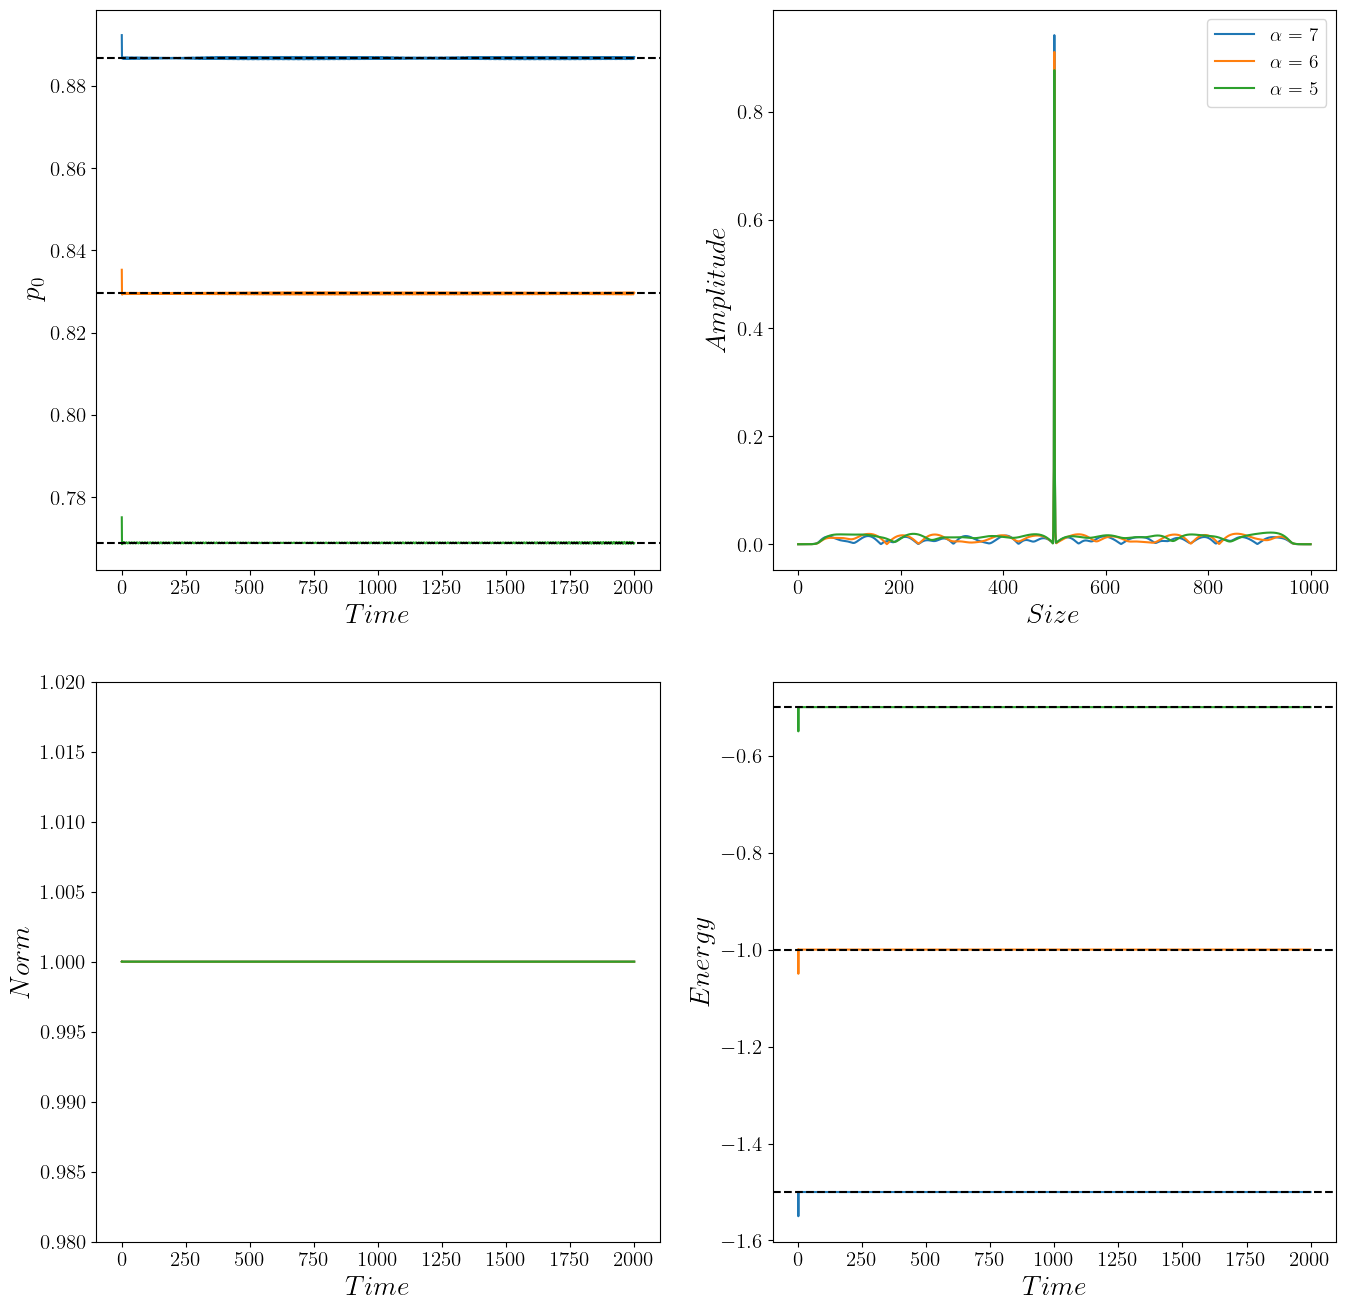

In [44]:
alpha = [7,6,5]
size = 2500
pzero = np.fromfile("./Adia-0.1/xi(0.8)/pzero.bin", dtype=np.float64).reshape(3, size)

def readcomp(file_path):
    # Read the binary file into a NumPy array
    with open(file_path, 'rb') as file:
        # Read the binary data and convert to complex numbers
        complex_data = np.frombuffer(file.read(), dtype=np.complex128)

    return complex_data

# Example usage
file_path = "./Adia-0.1/xi(0.8)/alphavec.bin"
complex_data = readcomp(file_path)

# Reshape the complex array if needed (assuming it has a known shape)
array_shape = (3, 1001)
reshaped_data = complex_data.reshape(array_shape)


norm = np.fromfile("./Adia-0.1/xi(0.8)/norm.bin", dtype=np.float64).reshape(3, size+1)
energy = np.fromfile("./Adia-0.1/xi(0.8)/energy.bin", dtype=np.float64).reshape(3, size+1)
Time = 2000
N = size
N1 = size + 1 
time = np.linspace(0, Time, N)
newtime = np.linspace(0, Time, N1)
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(16, 16))
ax[0,0].plot(time, pzero[0])
ax[0,0].plot(time, pzero[1])
ax[0,0].plot(time, pzero[2])
ax[0,0].axhline(y = np.mean(pzero[0]), color = 'black', linestyle = '--')
ax[0,0].axhline(y = np.mean(pzero[1]), color = 'black', linestyle = '--')
ax[0,0].axhline(y = np.mean(pzero[2]), color = 'black', linestyle = '--')
ax[0,0].set_xlabel(r'$Time$')
ax[0,0].set_ylabel(r'$p_0$')

ax[0,1].plot(np.abs(reshaped_data[0]), label=r'$\alpha$ = ' + str(alpha[0]))
ax[0,1].plot(np.abs(reshaped_data[1]), label=r'$\alpha$ = ' + str(alpha[1]))
ax[0,1].plot(np.abs(reshaped_data[2]), label=r'$\alpha$ = ' + str(alpha[2]))
ax[0,1].set_xlabel(r'$Size$')
ax[0,1].set_ylabel(r'$Amplitude$')
ax[0,1].legend(fontsize = 14)


ax[1,0].plot(newtime, norm[0])
ax[1,0].plot(newtime, norm[1])
ax[1,0].plot(newtime, norm[2])
ax[1,0].set_ylim(0.98,1.02)
ax[1,0].set_xlabel(r'$Time$')
ax[1,0].set_ylabel(r'$Norm$')

ax[1,1].plot(newtime, energy[0])
ax[1,1].plot(newtime, energy[1])
ax[1,1].plot(newtime, energy[2])
ax[1,1].axhline(y = -1.5, color = 'black', linestyle = '--')
ax[1,1].axhline(y = -1, color = 'black', linestyle = '--')
ax[1,1].axhline(y = -0.5, color = 'black', linestyle = '--')
ax[1,1].set_xlabel(r'$Time$')
ax[1,1].set_ylabel(r'$Energy$')

print(np.mean(pzero[0]), np.mean(pzero[1]), np.mean(pzero[2]))

# Cheking DNLS

0.930194509384503 0.8209475939688294 0.6156718630333842
-1.5000648996329484 -0.6296957926001976 0.1330699653042132


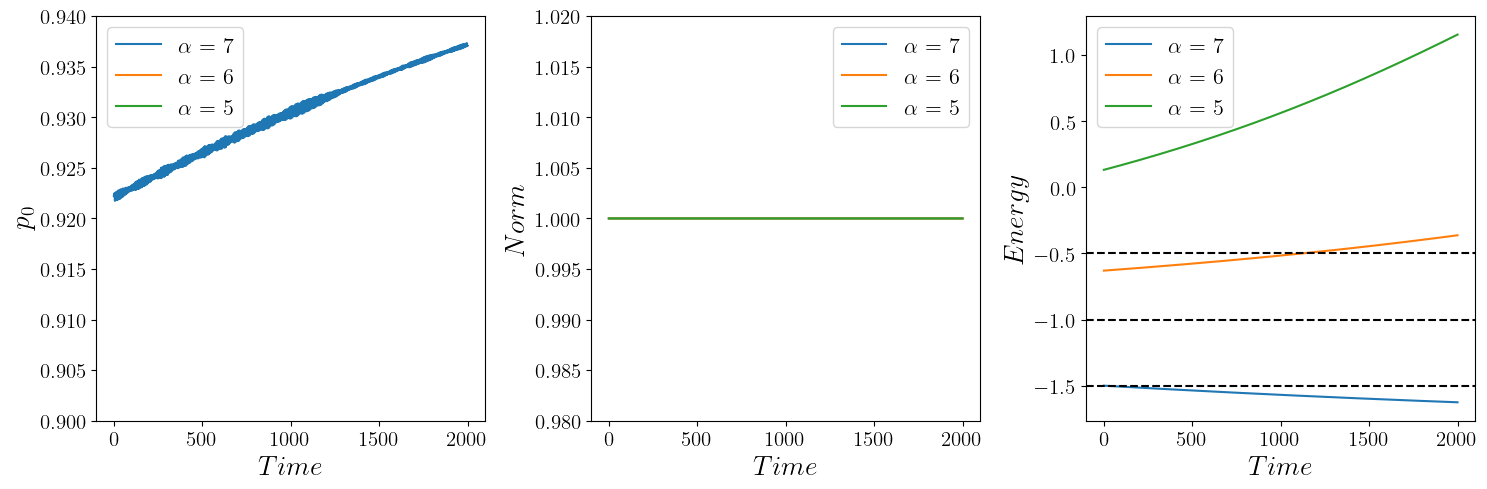

In [17]:
alpha = [7,6,5]
size = 2501
pzero = np.zeros((3,size))
norm = np.zeros((3,size))
energy = np.zeros((3,size))
j = 0
for i in alpha:
    pzero[j] = np.fromfile("./DNLS/" + str(i) + "/pzero.bin", dtype=np.float64).reshape(1, size)
    norm[j] = np.fromfile("./DNLS/" + str(i) + "/norm.bin", dtype=np.float64).reshape(1, size)
    energy[j] = np.fromfile("./DNLS/" + str(i) + "/energy.bin", dtype=np.float64).reshape(1, size)
    j = j+1
    
Time = 2000
N = size
N1 = size + 1 
time = np.linspace(0, Time, N)
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax[0].plot(time, pzero[0], label = r"$\alpha$ = " + str(alpha[0]))
ax[0].plot(time, pzero[1], label = r"$\alpha$ = " + str(alpha[1]))
ax[0].plot(time, pzero[2], label = r"$\alpha$ = " + str(alpha[2]))
ax[0].set_xlabel(r'$Time$')
ax[0].set_ylabel(r'$p_0$')
ax[0].legend(fontsize = 16)
ax[0].set_ylim(0.9,0.94)


ax[1].plot(time, norm[0], label = r"$\alpha$ = " + str(alpha[0]))
ax[1].plot(time, norm[1], label = r"$\alpha$ = " + str(alpha[1]))
ax[1].plot(time, norm[2], label = r"$\alpha$ = " + str(alpha[2]))
ax[1].set_ylim(0.98,1.02)
ax[1].set_xlabel(r'$Time$')
ax[1].set_ylabel(r'$Norm$')
ax[1].legend(fontsize = 16)

ax[2].plot(time, energy[0], label = r"$\alpha$ = " + str(alpha[0]))
ax[2].plot(time, energy[1], label = r"$\alpha$ = " + str(alpha[1]))
ax[2].plot(time, energy[2], label = r"$\alpha$ = " + str(alpha[2]))
ax[2].axhline(y = -1.5, color = 'black', linestyle = '--')
ax[2].axhline(y = -1, color = 'black', linestyle = '--')
ax[2].axhline(y = -0.5, color = 'black', linestyle = '--')
ax[2].set_xlabel(r'$Time$')
ax[2].set_ylabel(r'$Energy$')
ax[2].legend(fontsize = 16)

plt.tight_layout()
print(np.mean(pzero[0]), np.mean(pzero[1]), np.mean(pzero[2]))
print(energy[0,0], energy[1,0], energy[2,0])


# Ploting Wave with new Damping term

In [35]:

def writevec(file_path, complex_vector):
    with open(file_path, 'wb') as file:
        for complex_value in complex_vector:
            # Write real part
            file.write(complex_value.real.tobytes())
            # Write imaginary part
            file.write(complex_value.imag.tobytes())


# Save the complex vector to a binary file using the modified writevec function
for i in range(3):
    writevec( './' + str(i) + '.bin', reshaped_data[i])
    print("File saved successfully.")

File 0 saved successfully.
File 1 saved successfully.
File 2 saved successfully.


(25000, 1001)
(25000, 20)
833
30


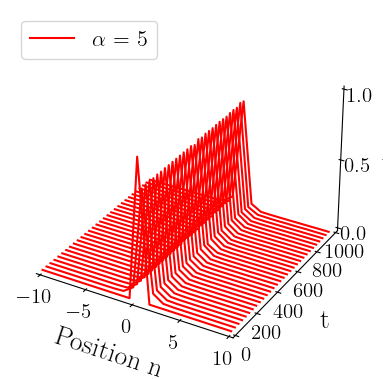

In [6]:
import numpy as np
import matplotlib.pyplot as plt

N = 25000
size = 1001
Time = 1000
mat = np.zeros((N, 1001))
alpha = np.array([5])
damp = 0.4

mat = np.fromfile("./Damping_alpha(" + str(alpha[0]) + ")/xi(" + str(damp) + ")/lambda(" + str(damp) + ").bin", dtype=np.float64).reshape(N, size)
mat10 = mat[:,490:510]#990:1010
print(np.shape(mat))
print(np.shape(mat10))

control = int(N / 30)
print(control)

# Plotting Features
fig = plt.figure(figsize=(10, 10))

for i in range(1):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    ax.set_xlim(-10, 10)
    ax.set_ylim(0, Time)
    xLabel = ax.set_xlabel(r"Position n", linespacing=3.2, fontsize=20)
    yLabel = ax.set_ylabel(r"t", linespacing=3.1, fontsize=20)
    zLabel = ax.set_zlabel(r"$P_n$", linespacing=3.4, fontsize=20)
    ax.zaxis.set_rotate_label(False)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
    ax.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
    ax.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)

    print(int(N / control))
    for j in range(1, int(N / control)):
        x = np.linspace(-np.shape(mat10[i])[0] / 2, np.shape(mat10[i])[0] / 2, np.shape(mat10[i])[0])
        y = np.linspace(0, Time, N)
        ax.plot(x, y[j * control] * np.ones(np.shape(mat10[i])[0]), mat10[j * control], color="r")

    ax.plot(x, np.ones(np.shape(mat10[i])[0]) * 0, mat10[0], color="r", label=r'$ \alpha $ = ' + str(alpha[i]))
    ax.set_zticks([0, 0.5, 1])
    ax.tick_params(axis='y', pad=-1) 
    ax.tick_params(axis='x', pad=-1) 
    ax.tick_params(axis='z', pad=-1) 

    ax.legend(fontsize=16, loc= 'upper left')


#plt.savefig("HDNLS(" + str(damp) + ").jpg")
plt.show()


(4, 2501)
-1.143552409771537 -0.3415440492407883 0.3633275931997062 0.9734402343827718


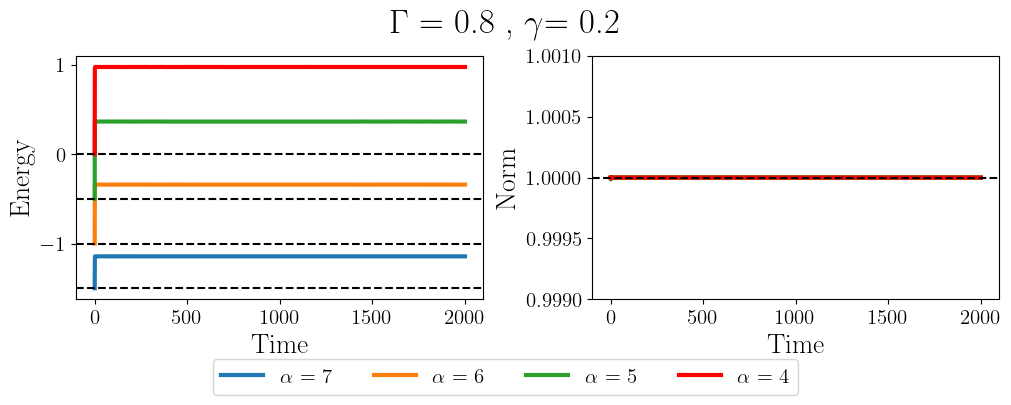

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), layout='constrained')
alpha = [7,6,5,4]
damp = 0.4
Time = 2000
N = 2501
#data = np.zeros((4,4))
data = np.fromfile("/home/comsol/Adia/xi(0.8)/energy.bin", dtype=np.float64).reshape(4,2501)
datanorm = np.fromfile("/home/comsol/Adia/xi(0.8)/norm.bin", dtype=np.float64).reshape(4,2501)
print(np.shape(datanorm))
y = np.linspace(0, Time, N)

#print(np.shape(data))

ax1.plot(y, data[0], label=r'$ \alpha $ = ' + str(alpha[0]), color="#1f77b4", linewidth=3)
ax1.plot(y, data[1], label=r'$ \alpha $ = ' + str(alpha[1]), color="#ff7f0e", linewidth=3)
ax1.plot(y, data[2], label=r'$ \alpha $ = ' + str(alpha[2]), color="#2ca02c", linewidth=3)
ax1.plot(y, data[3], label=r'$ \alpha $ = ' + str(alpha[3]), color="r", linewidth=3)

#ax1.plot(y, data[-2], label=r'$ \alpha $ = ' + str(alpha[3]), color="#d62728", linewidth=3)
#ax1.axhline(y = -2.0, color = 'black', linestyle = '--')
ax1.axhline(y = -1.5, color = 'black', linestyle = '--')
ax1.axhline(y = -1, color = 'black', linestyle = '--')
ax1.axhline(y = -0.5, color = 'black', linestyle = '--')
ax1.axhline(y = 0.0, color = 'black', linestyle = '--')

#ax1.legend(fontsize=15, loc="lower right")
ax1.set_xlabel("Time")
ax1.set_ylabel("Energy")
#ax1.set_ylim(-1.501, -1.499)
#ax1.set_xlim(-1, 5)
print(np.mean(data[0]), np.mean(data[1]), np.mean(data[2]), np.mean(data[3]))#, data[-2][-1]

ax2.plot(y, datanorm[0], color="#1f77b4", linewidth=3)
ax2.plot(y, datanorm[1], color="#ff7f0e", linewidth=3)
ax2.plot(y, datanorm[2], color="#2ca02c", linewidth=3)
ax2.plot(y, datanorm[3], color="r", linewidth=3)

#ax2.plot(y, datanorm[-2], color="#d62728", linewidth=3)
ax2.axhline(y = 1, color = 'black', linestyle = '--')
#fig.legend(fontsize=15, ncol=4, loc='upper center', bbox_to_anchor=(0.0,1.02,1,0.2), fancybox=True, shadow=True)
ax2.set_xlabel("Time")
ax2.set_ylabel("Norm")
ax2.set_ylim(0.999, 1.001)
#ax2.set_xlim(0.001, 20)

fig.suptitle("$ \Gamma $ = 0.8 , $ \gamma $= " + str(0.2), fontsize = 25)
fig.legend(fontsize=15, loc='outside lower center', ncol=4)
#plt.tight_layout()
#plt.savefig("Energy" + str(damp) + ".jpg")
plt.show()


50
[0.03463178-1.03963235j 0.07293911-1.07589611j 0.11467654-1.10853589j
 0.15958288-1.13731217j 0.20738214-1.16200224j 0.25778454-1.182401j
 0.31048757-1.19832181j 0.36517712-1.2095972j  0.4215286 -1.21607955j]


/home/comsol/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


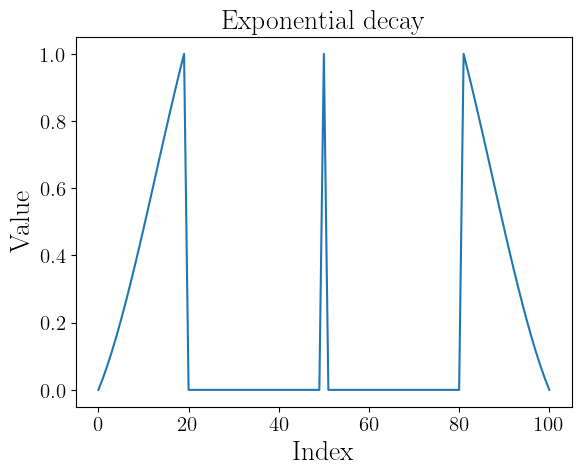

In [118]:
import numpy as np

def complex_exponential_decay_array(N, decay_rate, bond):
    # Create an array with zeros
    arr = np.zeros(N, dtype=np.complex128)

    # Calculate the middle index
    mid = N // 2
    print(mid)

    # Set the middle point to 1+0j
    arr[mid] = 1 + 0j

    # Calculate the decay factors for the first half
    decay_factors1 = np.exp(1j * (-decay_rate) * np.linspace(0, 1, bond))
    arr[(bond-1)::-1] = decay_factors1 * np.linspace(1, 0, bond) - 1j

    # Calculate the decay factors for the second half
    decay_factors2 = np.exp(1j * (-decay_rate) * np.linspace(0, 1, bond))
    arr[(N-bond):] = decay_factors2 * np.linspace(1, 0, bond)

    return arr

# Define the length of the array
N = 101

# Define the decay rate
decay_rate = 0.9

# Define the bond
bond = 20

# Generate the complex array
arr = complex_exponential_decay_array(N, decay_rate, bond)

# Print the resulting complex array
print(arr[1:10])

# Plot the resulting array
plt.plot(arr)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Exponential decay')

# Show the plot
plt.show()

# Ploting the values of the starting array

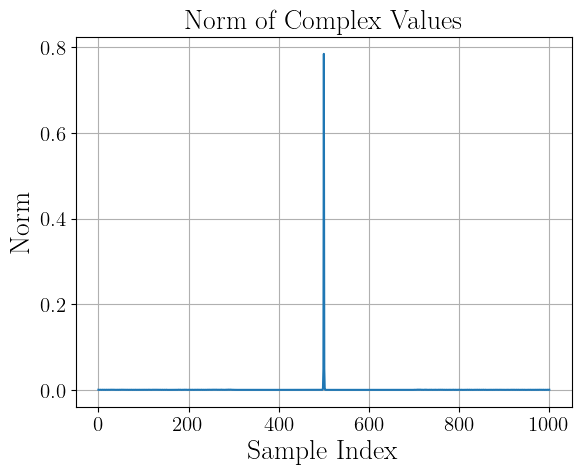

1.0000000053401865
0.7848643592986535
(0.8801349646965541-0.10112765802315914j)


In [12]:
complex_values = np.fromfile("./Damping_alpha(5)/xi(0.9)/startvec.bin", dtype=np.complex128)

# Compute the norm (magnitude) of the complex values
norms = np.abs(complex_values)**2

# Create a plot of the norm
plt.figure()
plt.plot(norms)
plt.xlabel('Sample Index')
plt.ylabel('Norm')
plt.title('Norm of Complex Values')
plt.grid(True)
#plt.xlim(500, 650)
plt.show()
print(np.sum(norms))
print(np.max(norms))
print(complex_values[500])

In [13]:
def H(a, alpha, N):
    result = complex(0, 0)

    for i in range(N):
        R = i + 1
        if R == N:

            R = N - 1  # Adjust the index to stay within the valid range
        result += 2.0 * np.abs(a[i])**2 - a[i] * a[R].conjugate() - a[R] * a[i].conjugate() - (alpha / 2) * np.abs(a[i])**2 * np.abs(a[i])**2

    return result


data = np.loadtxt("./Adia/split_file_prefixaa")
real_part = data[:, 0]
imaginary_part = data[:, 1]
complex_array = real_part + 1j * imaginary_part
print(H(complex_array, 7, 1001).real)

data = np.loadtxt("./Adia/split_file_prefixab")
real_part = data[:, 0]
imaginary_part = data[:, 1]
complex_array = real_part + 1j * imaginary_part
print(H(complex_array, 6, 1001).real)

data = np.loadtxt("./Adia/split_file_prefixac")
real_part = data[:, 0]
imaginary_part = data[:, 1]
complex_array = real_part + 1j * imaginary_part
print(H(complex_array, 5, 1001).real)

data = np.loadtxt("./Adia/split_file_prefixad")
real_part = data[:, 0]
imaginary_part = data[:, 1]
complex_array = real_part + 1j * imaginary_part
print(H(complex_array, 4, 1001).real)

-1.5000629593800634
-0.6297139767827226
0.13305718171237824
0.7897404583557184


(2500,)


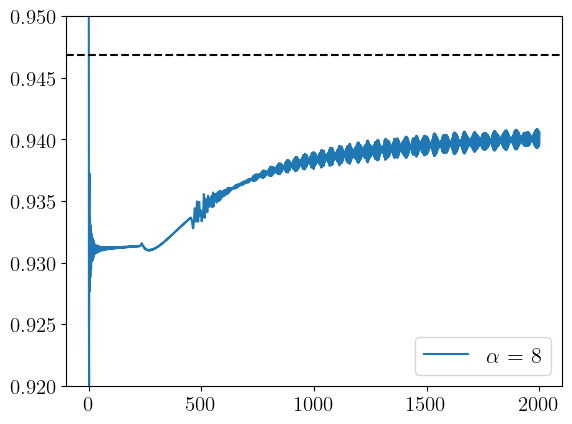

In [12]:
pzero = np.fromfile("./Damping_alpha(8)/xi(0.8)/pzero.bin", dtype=np.float64)
print(np.shape(pzero))
time = np.linspace(0, 2000, 2500)
plt.plot(time, pzero, label = r"$\alpha$ = " + str(8))
plt.axhline(y = 0.94685, color = 'black', linestyle = '--')
plt.axhline(y = 0.9528, color = 'black', linestyle = '--')
#plt.axhline(y = 0.9312, color = 'black', linestyle = '--')
#plt.axhline(y = 0.94, color = 'black', linestyle = '--')
#plt.ylim(0.94,0.96)
plt.ylim(0.92,0.95)
plt.legend(fontsize=16)


In [ ]:
-1.9950619472567421 -1.500035547369958 -1.0000239728925353 -0.5000125140731997